# SETUP

## IMPORTING LIBRARIES

In [601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import tarfile
import urllib

import time
import warnings

## INITIAL CONFIGURIATION

In [719]:
warnings.filterwarnings('ignore')

np.random.seed(42)

pd.set_option("display.max_columns", 30)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 70)

%matplotlib inline

# DATA

## LOADING DATA

In [603]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [604]:
fetch_housing_data()

In [605]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [606]:
df = load_housing_data()

## PRELIMINARY ANALYSIS

In [607]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [608]:
df.shape

(20640, 10)

In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [610]:
df.isna().sum()/df.shape[0]

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [611]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [612]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


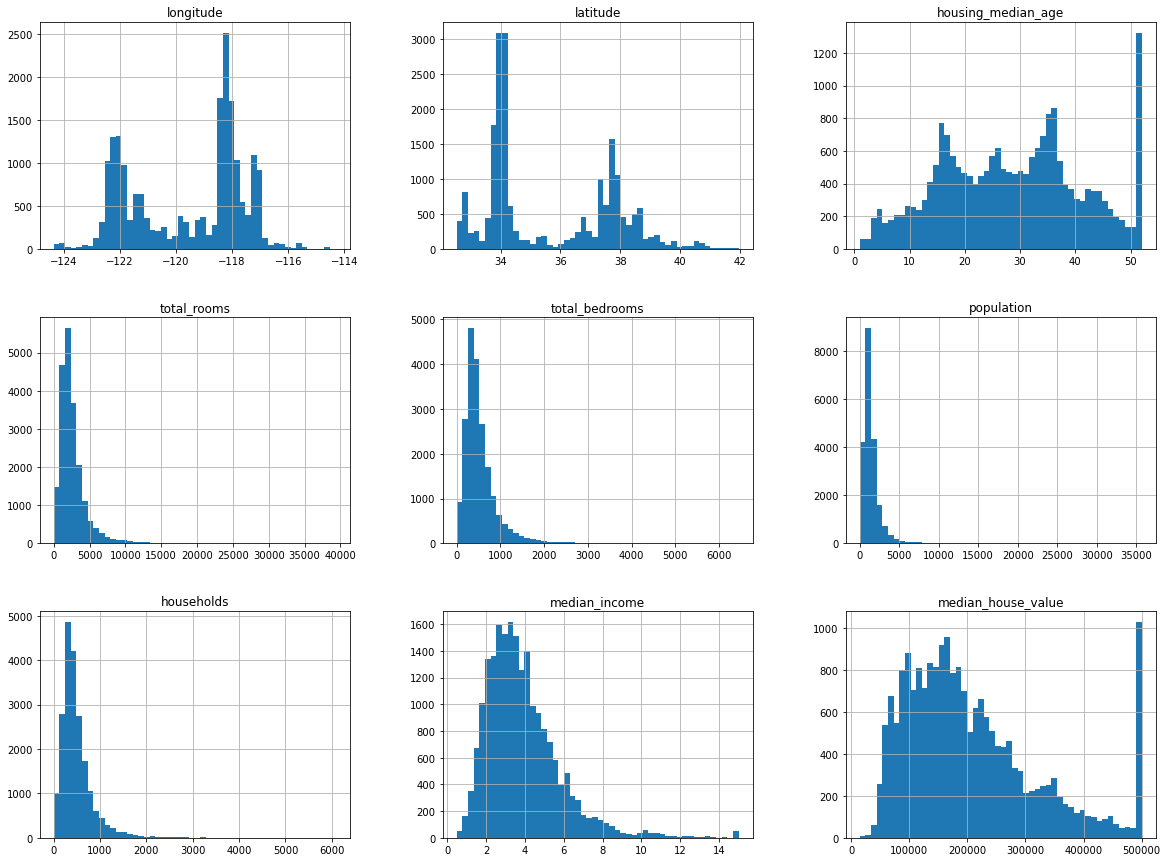

In [613]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## CREATING A TEST SET

### FIRST METHOD : STRATIFIED SAMPLING ON THE BASIS OF "median_income"

In [614]:
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

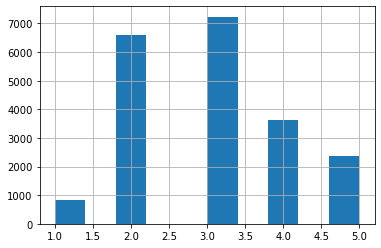

In [615]:
df["income_cat"].hist()

In [616]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

### SECOND METHOD : RANDOM SAMPLING

In [617]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

### COMPARISON

In [618]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [619]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


### DROPPING THE COLUMN

In [620]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# DATA VISUALIZATION

In [621]:
housing = strat_train_set.copy()

## VISUALIZING GEOGRAPHICAL DATA

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

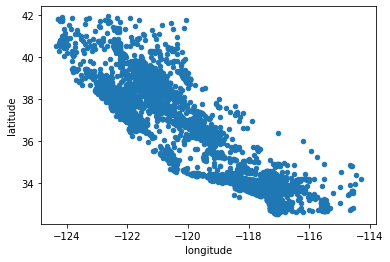

In [622]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

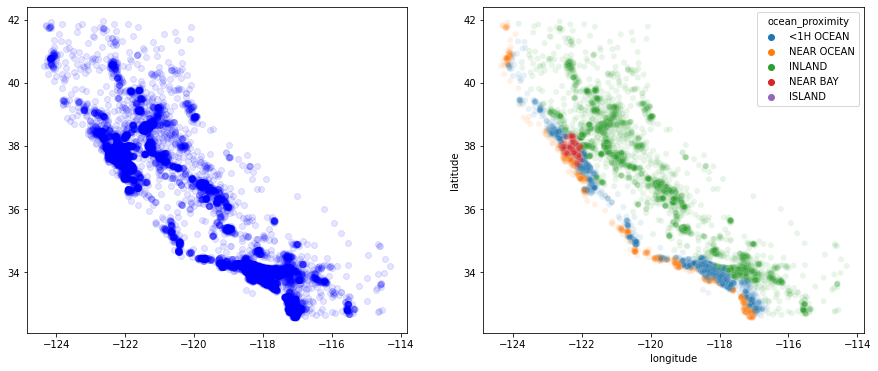

In [623]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))

axs[0].plot(housing["longitude"], housing["latitude"], "bo", alpha = 0.1)
sns.scatterplot(x = housing["longitude"], y = housing["latitude"], hue = housing["ocean_proximity"], alpha = 0.1, ax=axs[1])

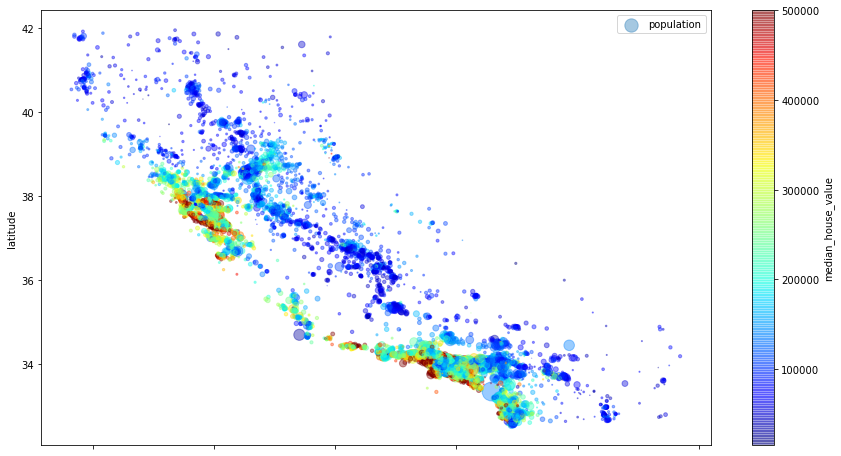

In [624]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(15,8),
             s=housing["population"]/100, label="population", 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

## LOOKING FOR CORRELATIONS

In [625]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

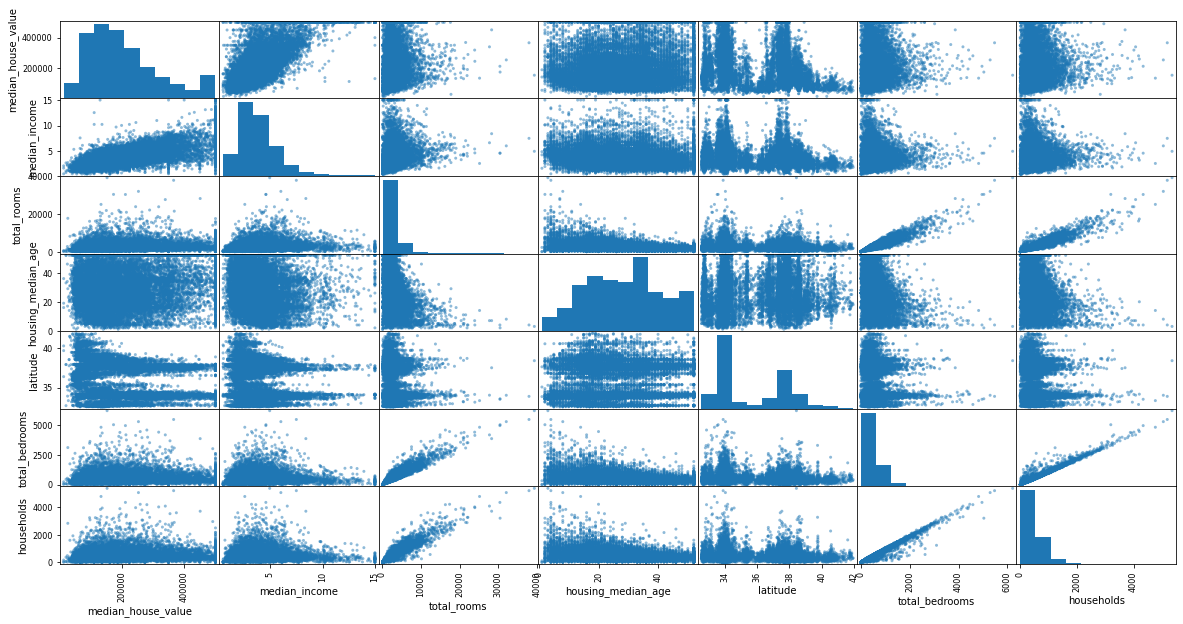

In [626]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude", "total_bedrooms", "households"]
scatter_matrix(housing[attributes], figsize=(20, 10))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

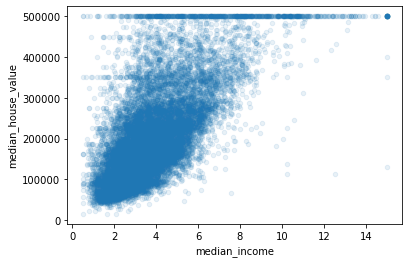

In [627]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

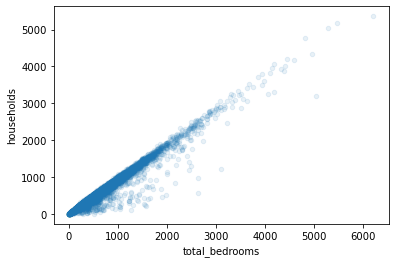

In [628]:
housing.plot(kind = "scatter", x = "total_bedrooms", y = "households", alpha = 0.1)

## EXPERIMENTING WITH ATTRIBUTE COMBINATIONS

In [629]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["extra_rooms"] = housing["rooms_per_household"] - housing["bedrooms_per_household"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [630]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
extra_rooms                 0.183723
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# PREPARE THE DATA FOR MACHINE LEARNING ALGORITHMS

In [631]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## DATA CLEANING

In [632]:
housing.isna().sum() / housing.shape[0]

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.009569
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
dtype: float64

In [633]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [634]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [635]:
imputer.strategy

'median'

In [636]:
pd.DataFrame(zip(housing_num.columns, housing_num.isna().sum(), imputer.statistics_), columns=["columns", "no_null", "median"])

,columns,no_null,median
0,longitude,0,-118.5100
1,latitude,0,34.2600
2,housing_median_age,0,29.0000
3,total_rooms,0,2119.5000
4,total_bedrooms,158,433.0000
5,population,0,1164.0000
6,households,0,408.0000
7,median_income,0,3.5409


In [637]:
X = imputer.transform(housing_num)

In [638]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [639]:
housing_tr.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621


## HANDLING TEXT AND CATEGORICAL ATTRIBUTES

In [640]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [641]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [642]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [643]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [644]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [645]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## CUSTOM TRANSFORMERS

In [646]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [647]:
print(housing_extra_attribs)

[[-121.89 37.29 38.0 ... '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ... '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ... 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ...
 [-116.4 34.09 9.0 ... 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ... '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ... 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


In [648]:
attr_adder.get_params()

{'add_bedrooms_per_room': False}

In [649]:
# Another method(more dynamic one) to add column  numbers
cols = ["total_rooms", "total_bedrooms", "population", "households"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in cols]

print(rooms_ix, bedrooms_ix, population_ix, households_ix, sep = ", ")

3, 4, 5, 6


## TRANSFORMATION PIPELINES

In [650]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [651]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# SELECT AND TRAIN A MODEL

## TRAINING AND EVALUATING ON THE TRAINING SET

### Linear Regression

In [652]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [653]:
some_data = housing.iloc[:5]
some_label = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)         #full_pipeline.fit_transform(some_data), why not?

pd.DataFrame(zip(lin_reg.predict(some_data_prepared).round(2), list(some_label)), columns=["Predicted Values", "Actual Values"])

,Predicted Values,Actual Values
0,210644.60,286600.0
1,317768.81,340600.0
2,210956.43,196900.0
3,59218.99,46300.0
4,189747.56,254500.0


In [654]:
from sklearn.metrics import mean_squared_error
housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [655]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(housing_labels, housing_pred)
lin_r2

0.6481624842804428

### Decision Tree

In [656]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [657]:
housing_pred = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [658]:
tree_r2 = r2_score(housing_labels, housing_pred)
tree_r2

1.0

### Random Forest

In [659]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [660]:
housing_pred = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18609.0226030939

In [661]:
forest_r2 = r2_score(housing_labels, housing_pred)
forest_r2

0.9741307356577666

## BETTER EVALUATION USING CROSS-VALIDATION

### Using neg_mean_squared_error

In [662]:
from sklearn.model_selection import cross_val_score

#For Decision Tree
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [663]:
def display_scores(scores):
    print(f"Scores : {scores}")
    print()
    print(f"'Mean +- Standard Deviation' : {scores.mean()} +- {scores.std()}")

In [664]:
display_scores(tree_rmse_scores)

Scores : [68885.26045291 64997.84246405 70524.49231657 68330.9185452
 69472.79394418 75445.75022928 70793.58980443 69510.00248853
 75990.97929614 70091.29649693]

'Mean +- Standard Deviation' : 70404.29260382043 +- 3072.3739416161693


In [665]:
#For Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]

'Mean +- Standard Deviation' : 69052.46136345083 +- 2731.6740017983443


In [666]:
#For Random Forest
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores : [49827.1665571  47458.95317232 49710.01430517 52349.70294588
 49639.53564894 53337.18449877 49026.75948993 48283.41516085
 52722.03925026 50356.71199308]

'Mean +- Standard Deviation' : 50271.148302229354 +- 1845.3755350102963


### Using R2 score

In [667]:
#For Decision Tree
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="r2", cv=10)
display_scores(scores)

Scores : [0.61224716 0.66861261 0.6189365  0.66049495 0.61029687 0.59064209
 0.62875239 0.62586452 0.57522878 0.63005983]

'Mean +- Standard Deviation' : 0.6221135694920269 +- 0.02681844568648593


In [668]:
#For Linear Regression
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring="r2", cv=10)
display_scores(scores)

Scores : [0.62810772 0.67366246 0.62569782 0.59558993 0.65206084 0.63573031
 0.68070897 0.66309703 0.6262189  0.64803579]

'Mean +- Standard Deviation' : 0.6428909748300279 +- 0.024447282122050874


In [669]:
#For Random Forest
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring = "r2", cv=10)
display_scores(scores)

Scores : [0.79332386 0.83558292 0.80858769 0.80113041 0.81533511 0.79288963
 0.81901169 0.83399716 0.79347833 0.80727192]

'Mean +- Standard Deviation' : 0.8100608707024669 +- 0.015072880842975818


# FINE-TUNE YOUR MODEL

## GRID SEARCH

In [767]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {"n_estimators" : [3, 10 ,30, 40], "max_features" : [2, 4, 6, 8, 10]},
    {"bootstrap" : [False], "n_estimators" : [3, 10, 30], "max_features" : [2, 3, 4, 6]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, params_grid, cv=5, 
                          scoring = "neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [768]:
print(f"grid_search.best_params_ \t: \t{grid_search.best_params_}")
print(f"grid_search.best_estimator_ \t: \t{grid_search.best_estimator_}")

grid_search.best_params_ 	: 	{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
grid_search.best_estimator_ 	: 	RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=30,
                      random_state=42)


In [769]:
cvres_mse = grid_search.cv_results_
cvres_mse

{'mean_fit_time': array([0.18873434, 0.63146906, 1.90071502, 2.49469819, 0.30911679,
        1.01385474, 3.01707759, 3.95088868, 0.3941082 , 1.33324823,
        4.1591527 , 5.5434721 , 0.50329189, 1.74053822, 5.1913125 ,
        7.0273459 , 0.63407664, 2.10060024, 6.42592182, 8.52500005,
        0.28709745, 1.00559678, 2.96079297, 0.40095019, 1.26370597,
        3.86115475, 0.48734455, 1.5789413 , 4.73513703, 0.67879853,
        2.21143227, 6.61490369]),
 'std_fit_time': array([0.01490154, 0.0263881 , 0.04541716, 0.01877179, 0.02060651,
        0.02845372, 0.05911514, 0.05888137, 0.02773335, 0.0190927 ,
        0.10195551, 0.09333557, 0.02565657, 0.04497324, 0.03614816,
        0.06138663, 0.03129854, 0.0234342 , 0.05737013, 0.11317421,
        0.00659549, 0.04487901, 0.02680529, 0.01968648, 0.04322406,
        0.10141162, 0.03803425, 0.02147056, 0.06265873, 0.01159004,
        0.05427558, 0.05303144]),
 'mean_score_time': array([0.00989399, 0.02751446, 0.0808815 , 0.10655494, 0.010606

In [774]:
for mean_train_score, mean_test_score, params in zip(
    cvres_mse["mean_train_score"], cvres_mse["mean_test_score"], cvres_mse["params"]
):
    print(
        np.sqrt(-mean_train_score).round(1), np.sqrt(-mean_test_score).round(1), params, 
        sep="\t\t")

33250.0		63669.1		{'max_features': 2, 'n_estimators': 3}
24122.2		55627.1		{'max_features': 2, 'n_estimators': 10}
20963.6		53384.6		{'max_features': 2, 'n_estimators': 30}
20478.5		52980.4		{'max_features': 2, 'n_estimators': 40}
31382.2		60966.0		{'max_features': 4, 'n_estimators': 3}
22724.1		52741.0		{'max_features': 4, 'n_estimators': 10}
19695.9		50377.4		{'max_features': 4, 'n_estimators': 30}
19360.5		50143.1		{'max_features': 4, 'n_estimators': 40}
30039.9		58663.9		{'max_features': 6, 'n_estimators': 3}
22390.5		52006.2		{'max_features': 6, 'n_estimators': 10}
19599.2		50146.5		{'max_features': 6, 'n_estimators': 30}
19230.3		49892.3		{'max_features': 6, 'n_estimators': 40}
29805.3		57869.3		{'max_features': 8, 'n_estimators': 3}
22189.9		51711.1		{'max_features': 8, 'n_estimators': 10}
19520.1		49682.3		{'max_features': 8, 'n_estimators': 30}
19179.7		49504.6		{'max_features': 8, 'n_estimators': 40}
30165.3		58730.8		{'max_features': 10, 'n_estimators': 3}
22282.3		52243.0		

---

In [771]:
from sklearn.model_selection import GridSearchCV

params_grid = [
    {"n_estimators" : [3, 10 ,30, 40], "max_features" : [2, 4, 6, 8, 10]},
    {"bootstrap" : [False], "n_estimators" : [3, 10, 30], "max_features" : [2, 3, 4, 6]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, params_grid, cv=5, 
                          scoring = "r2",
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='r2')

In [772]:
print(f"grid_search.best_params_ \t: \t{grid_search.best_params_}")
print(f"grid_search.best_estimator_ \t: \t{grid_search.best_estimator_}")

grid_search.best_params_ 	: 	{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
grid_search.best_estimator_ 	: 	RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=30,
                      random_state=42)


In [773]:
cvres_r2 = grid_search.cv_results_

for mean_train_score, mean_test_score, params in zip(
    cvres_r2["mean_train_score"], cvres_r2["mean_test_score"], cvres_r2["params"]
):
    print(
        mean_train_score.round(4), mean_test_score.round(4), params, 
        sep="\t\t")

0.9174		0.6971		{'max_features': 2, 'n_estimators': 3}
0.9565		0.7687		{'max_features': 2, 'n_estimators': 10}
0.9672		0.787		{'max_features': 2, 'n_estimators': 30}
0.9687		0.7902		{'max_features': 2, 'n_estimators': 40}
0.9264		0.7221		{'max_features': 4, 'n_estimators': 3}
0.9614		0.7921		{'max_features': 4, 'n_estimators': 10}
0.971		0.8104		{'max_features': 4, 'n_estimators': 30}
0.972		0.8121		{'max_features': 4, 'n_estimators': 40}
0.9326		0.7429		{'max_features': 6, 'n_estimators': 3}
0.9625		0.7979		{'max_features': 6, 'n_estimators': 10}
0.9713		0.8121		{'max_features': 6, 'n_estimators': 30}
0.9724		0.814		{'max_features': 6, 'n_estimators': 40}
0.9336		0.7496		{'max_features': 8, 'n_estimators': 3}
0.9632		0.8001		{'max_features': 8, 'n_estimators': 10}
0.9715		0.8155		{'max_features': 8, 'n_estimators': 30}
0.9725		0.8169		{'max_features': 8, 'n_estimators': 40}
0.932		0.7422		{'max_features': 10, 'n_estimators': 3}
0.9629		0.7961		{'max_features': 10, 'n_estimators': 10}


In [795]:
pd.DataFrame(cvres_r2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.200095,0.015008,0.011605,0.001498,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.701884,0.693219,0.691980,0.711625,0.686659,0.697073,0.008765,32,0.921239,0.917233,0.916215,0.916669,0.915649,0.917401,1.988492e-03
1,0.615572,0.020645,0.028158,0.000919,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.763241,0.759223,0.770241,0.788322,0.762327,0.768671,0.010465,23,0.956130,0.956031,0.956650,0.957176,0.956672,0.956532,4.152278e-04
2,1.923353,0.028991,0.079032,0.001087,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.791097,0.776516,0.783590,0.806437,0.777521,0.787032,0.011009,21,0.967573,0.967112,0.967195,0.967210,0.966752,0.967169,2.618771e-04
3,2.530982,0.058739,0.106475,0.001115,2,40,NaN,"{'max_features': 2, 'n_estimators': 40}",0.793882,0.780930,0.786306,0.807667,0.782447,0.790247,0.009796,20,0.968897,0.968732,0.968684,0.968587,0.968455,0.968671,1.474424e-04
4,0.310334,0.013361,0.010623,0.000606,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",0.710230,0.719866,0.725883,0.747425,0.706909,0.722063,0.014369,30,0.926982,0.924166,0.931194,0.922284,0.927512,0.926427,3.049105e-03
5,0.993502,0.039308,0.029328,0.000945,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.792876,0.794017,0.787704,0.806672,0.779225,0.792099,0.008963,19,0.962273,0.961334,0.962759,0.959275,0.961468,0.961422,1.194296e-03
6,2.986278,0.042790,0.080868,0.002909,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.814560,0.808520,0.804282,0.822832,0.801607,0.810360,0.007617,10,0.971587,0.970940,0.971554,0.969727,0.971285,0.971019,6.861082e-04
7,4.042617,0.098060,0.105532,0.005553,4,40,NaN,"{'max_features': 4, 'n_estimators': 40}",0.815831,0.809034,0.805924,0.824090,0.805728,0.812122,0.007012,7,0.972169,0.972074,0.972495,0.971002,0.972252,0.971998,5.175137e-04
8,0.411362,0.010681,0.010771,0.000760,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",0.757657,0.734703,0.736287,0.754061,0.731943,0.742930,0.010708,27,0.931570,0.933443,0.929815,0.932503,0.935599,0.932586,1.925174e-03
9,1.381124,0.035989,0.029465,0.002727,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",0.801936,0.794199,0.797214,0.813740,0.782261,0.797870,0.010256,15,0.963138,0.962210,0.962521,0.962615,0.962250,0.962547,3.334542e-04


## ANALYZE THE BEST MODELS AND THEIR ERRORS

In [812]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.92338207e-02, 8.85316524e-02, 4.21931308e-02, 2.07338275e-02,
       1.94425390e-02, 2.11335068e-02, 1.80390203e-02, 2.73621124e-01,
       6.76096493e-02, 9.96882922e-02, 9.41056631e-02, 1.75335802e-02,
       1.32485135e-01, 4.18525899e-05, 8.05254387e-03, 7.55466207e-03])

In [879]:
extra_attribs = ["rooms_per_hhold", "population_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(full_pipeline.named_transformers_["cat"].categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs
corr_df = pd.DataFrame(
    sorted(zip(feature_importances.round(6), attributes), reverse = True), 
    columns=["Correlation", "Feature"]
)
corr_df

,Correlation,Feature
0,0.273621,median_income
1,0.132485,INLAND
2,0.099688,population_per_hhold
3,0.094106,bedrooms_per_room
4,0.089234,longitude
5,0.088532,latitude
6,0.067610,rooms_per_hhold
7,0.042193,housing_median_age
8,0.021134,population
9,0.020734,total_rooms


## EVALUATE YOUR SYSTEM ON THE TEST SET

In [899]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
y_final_pred = final_model.predict(x_test_prepared)

#Root mean squared error
mse = mean_squared_error(y_test, y_final_pred)
rmse = np.sqrt(mse)

print(f"Final Root Mean-Squared Error is : {rmse.round(3)}")

r2 = r2_score(y_test, y_final_pred)
print(f"Final R2 score of the model is : {r2.round(3)}")

Final Root Mean-Squared Error is : 46417.43
Final R2 score of the model is : 0.835


In [901]:
from scipy import stats

confidence = 0.95
squared_errors = (y_final_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([44490.41450446, 48267.57279926])

# SAVING MODEL

In [934]:
final_model

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=30,
                      random_state=42)

In [935]:
import joblib
joblib.dump(final_model, "model.pkl")

['model.pkl']

# EXERCISE

## Q.1
<hr>
Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [956]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr_reg = SVR()
params_grid = [
    {"kernel": ["linear"], "C": [1, 7, 10, 70, 100, 700, 1000, 7000, 10000]},
    {"kernel": ["rbf"], "C": [1, 10, 100, 1000], "gamma": [0.01, 0.07, 0.1, 0.7, 1]}
]

grid_search_svr = GridSearchCV(svr_reg, params_grid, cv= 5,
                              scoring="r2",
                              return_train_score= True, verbose=3)

grid_search_svr.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .............................C=1, kernel=linear; total time=  26.5s
[CV 2/5] END .............................C=1, kernel=linear; total time=  26.8s
[CV 3/5] END .............................C=1, kernel=linear; total time=  30.2s
[CV 4/5] END .............................C=1, kernel=linear; total time=  30.7s
[CV 5/5] END .............................C=1, kernel=linear; total time=  31.4s
[CV 1/5] END .............................C=7, kernel=linear; total time=  30.8s
[CV 2/5] END .............................C=7, kernel=linear; total time=  29.4s
[CV 3/5] END .............................C=7, kernel=linear; total time=  26.5s
[CV 4/5] END .............................C=7, kernel=linear; total time=  26.9s
[CV 5/5] END .............................C=7, kernel=linear; total time=  26.2s
[CV 1/5] END ............................C=10, kernel=linear; total time=  26.0s
[CV 2/5] END ............................C=10, 

[CV 2/5] END ..................C=100, gamma=0.07, kernel=rbf; total time=  51.7s
[CV 3/5] END ..................C=100, gamma=0.07, kernel=rbf; total time=  52.9s
[CV 4/5] END ..................C=100, gamma=0.07, kernel=rbf; total time=  45.1s
[CV 5/5] END ..................C=100, gamma=0.07, kernel=rbf; total time=  46.3s
[CV 1/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=  29.7s
[CV 2/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=  29.7s
[CV 3/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=  29.6s
[CV 4/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=  29.7s
[CV 5/5] END ...................C=100, gamma=0.1, kernel=rbf; total time=  30.1s
[CV 1/5] END ...................C=100, gamma=0.7, kernel=rbf; total time=  28.7s
[CV 2/5] END ...................C=100, gamma=0.7, kernel=rbf; total time=  29.1s
[CV 3/5] END ...................C=100, gamma=0.7, kernel=rbf; total time=  28.8s
[CV 4/5] END ...............

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 7, 10, 70, 100, 700, 1000, 7000, 10000],
                          'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.07, 0.1, 0.7, 1],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='r2', verbose=3)

In [957]:
grid_search_svr.best_estimator_

SVR(C=10000, kernel='linear')

In [959]:
grid_search_svr.best_score_

0.6299933701984723

## Q.2
<hr>
Try replacing GridSearchCV with RandomizedSearchCV.

In [1026]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

svr_reg = SVR()
params_dist = {
    "kernel": ["linear", "rbf"],
    "C": np.linspace(1, 50000, 25),
    "gamma": expon(scale=1.0)
}

rand_search = RandomizedSearchCV(svr_reg, params_dist, 
                                 n_iter= 30, cv= 5, scoring="r2",
                                verbose= 3, random_state= 42)
rand_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END C=12500.75, gamma=1.5923005340557224, kernel=linear; total time=  22.9s
[CV 2/5] END C=12500.75, gamma=1.5923005340557224, kernel=linear; total time=  23.6s
[CV 3/5] END C=12500.75, gamma=1.5923005340557224, kernel=linear; total time=  23.0s
[CV 4/5] END C=12500.75, gamma=1.5923005340557224, kernel=linear; total time=  24.5s
[CV 5/5] END C=12500.75, gamma=1.5923005340557224, kernel=linear; total time=  22.4s
[CV 1/5] END C=20833.916666666664, gamma=1.5127241738646855, kernel=linear; total time=  28.6s
[CV 2/5] END C=20833.916666666664, gamma=1.5127241738646855, kernel=linear; total time=  28.7s
[CV 3/5] END C=20833.916666666664, gamma=1.5127241738646855, kernel=linear; total time=  31.1s
[CV 4/5] END C=20833.916666666664, gamma=1.5127241738646855, kernel=linear; total time=  28.6s
[CV 5/5] END C=20833.916666666664, gamma=1.5127241738646855, kernel=linear; total time=  26.5s
[CV 1/5] END C=12500.75, gamma=0.59028

[CV 2/5] END C=41666.83333333333, gamma=0.2625262508953778, kernel=rbf; total time=  27.0s
[CV 3/5] END C=41666.83333333333, gamma=0.2625262508953778, kernel=rbf; total time=  27.4s
[CV 4/5] END C=41666.83333333333, gamma=0.2625262508953778, kernel=rbf; total time=  25.3s
[CV 5/5] END C=41666.83333333333, gamma=0.2625262508953778, kernel=rbf; total time=  18.6s
[CV 1/5] END C=29167.083333333332, gamma=1.1496851404879345, kernel=rbf; total time=  20.4s
[CV 2/5] END C=29167.083333333332, gamma=1.1496851404879345, kernel=rbf; total time=  20.3s
[CV 3/5] END C=29167.083333333332, gamma=1.1496851404879345, kernel=rbf; total time=  20.5s
[CV 4/5] END C=29167.083333333332, gamma=1.1496851404879345, kernel=rbf; total time=  20.0s
[CV 5/5] END C=29167.083333333332, gamma=1.1496851404879345, kernel=rbf; total time=  19.9s
[CV 1/5] END C=14584.041666666666, gamma=0.034993721443479085, kernel=rbf; total time=  16.6s
[CV 2/5] END C=14584.041666666666, gamma=0.034993721443479085, kernel=rbf; total t

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=30,
                   param_distributions={'C': array([1.00000000e+00, 2.08429167e+03, 4.16758333e+03, 6.25087500e+03,
       8.33416667e+03, 1.04174583e+04, 1.25007500e+04, 1.45840417e+04,
       1.66673333e+04, 1.87506250e+04, 2.08339167e+04, 2.29172083e+04,
       2.50005000e+04, 2.70837917e+04, 2.91670833e+04, 3.12503750e+04,
       3.33336667e+04, 3.54169583e+04, 3.75002500e+04, 3.95835417e+04,
       4.16668333e+04, 4.37501250e+04, 4.58334167e+04, 4.79167083e+04,
       5.00000000e+04]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023C4FB64CD0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='r2', verbose=3)

In [1027]:
rand_search.best_estimator_

SVR(C=41666.83333333333, gamma=0.2625262508953778)

In [1028]:
rand_search.best_score_

0.7603407537229622

## Q.3
<hr>
Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [1295]:
housing_demo = housing.copy()
housing_demo.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [1281]:
from sklearn.base import BaseEstimator, TransformerMixin

feature_importances = grid_search.best_estimator_.feature_importances_

def top_indices(arr, k):
    return sorted(np.array(arr).argsort()[-k:])

class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, count = 3):
        self.feature_importances = feature_importances
        self.count = count
        
    def fit(self, X, y=None):
        self.feature_indices_ = top_indices(self.feature_importances, self.count)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [1375]:
final_data_preparation_pipeline = Pipeline([
    ("Preparation", full_pipeline), 
    ("Feature_Selection", FeatureExtractor(feature_importances, count= 5))
])

In [1376]:
final_data_preparation_pipeline.steps

[('Preparation',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('attribs_adder',
                                                    CombinedAttributesAdder()),
                                                   ('std_scaler',
                                                    StandardScaler())]),
                                   ['longitude', 'latitude', 'housing_median_age',
                                    'total_rooms', 'total_bedrooms', 'population',
                                    'households', 'median_income']),
                                  ('cat', OneHotEncoder(), ['ocean_proximity'])])),
 ('Feature_Selection',
  FeatureExtractor(count=5,
                   feature_importances=array([8.92338207e-02, 8.85316524e-02, 4.21931308e-02, 2.07338275e-02,
         1.94425390e-02

In [1377]:
housing_top_k_features = final_data_preparation_pipeline.fit_transform(housing_demo)
housing_top_k_features

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ],
       ...,
       [ 1.58648943, -0.3167053 , -0.03055414, -0.52177644,  1.        ],
       [ 0.78221312,  0.09812139,  0.06150916, -0.30340741,  0.        ],
       [-1.43579109, -0.15779865, -0.09586294,  0.10180567,  0.        ]])

In [1294]:
print(
    "The result of pipeline for first 3 indices:\n", 
    housing_top_k_features[: 3]
)

print("-" * 100)

print(
    "First 3 indices of top 5 features of the original dataframe used for modelling:\n", 
    housing_prepared[0: 3, top_indices(feature_importances, 5)]
)

The result of pipeline for first 3 indices:
 [[-1.15604281 -0.61493744 -0.08649871  0.15531753  0.        ]
 [-1.17602483  1.33645936 -0.03353391 -0.83628902  0.        ]
 [ 1.18684903 -0.5320456  -0.09240499  0.4222004   0.        ]]
----------------------------------------------------------------------------------------------------
First 3 indices of top 5 features of the original dataframe used for modelling:
 [[-1.15604281 -0.61493744 -0.08649871  0.15531753  0.        ]
 [-1.17602483  1.33645936 -0.03353391 -0.83628902  0.        ]
 [ 1.18684903 -0.5320456  -0.09240499  0.4222004   0.        ]]


## Q.4
<hr>
Try creating a single pipeline that does the full data preparation plus the final prediction.

In [1378]:
final_pipeline = Pipeline([
    ("Data_Preparation", final_data_preparation_pipeline), 
    ("Model: Random Forest", RandomForestRegressor(**grid_search.best_params_))
])

In [1379]:
final_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('Data_Preparation',
                 Pipeline(steps=[('Preparation',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributesAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['longitude',
                                                                    'latitude',
                                                 

## Q.5
<hr>
Automatically explore some preparation options using GridSearchCV.

In [1386]:
final_pipeline.get_params()

{'memory': None,
 'steps': [('Data_Preparation', Pipeline(steps=[('Preparation',
                    ColumnTransformer(transformers=[('num',
                                                     Pipeline(steps=[('imputer',
                                                                      SimpleImputer(strategy='median')),
                                                                     ('attribs_adder',
                                                                      CombinedAttributesAdder()),
                                                                     ('std_scaler',
                                                                      StandardScaler())]),
                                                     ['longitude', 'latitude',
                                                      'housing_median_age',
                                                      'total_rooms',
                                                      'total_bedrooms',
                 

In [1385]:
print(*final_pipeline.get_params().keys(), sep= "\n")

memory
steps
verbose
Data_Preparation
Model: Random Forest
Data_Preparation__memory
Data_Preparation__steps
Data_Preparation__verbose
Data_Preparation__Preparation
Data_Preparation__Feature_Selection
Data_Preparation__Preparation__n_jobs
Data_Preparation__Preparation__remainder
Data_Preparation__Preparation__sparse_threshold
Data_Preparation__Preparation__transformer_weights
Data_Preparation__Preparation__transformers
Data_Preparation__Preparation__verbose
Data_Preparation__Preparation__num
Data_Preparation__Preparation__cat
Data_Preparation__Preparation__num__memory
Data_Preparation__Preparation__num__steps
Data_Preparation__Preparation__num__verbose
Data_Preparation__Preparation__num__imputer
Data_Preparation__Preparation__num__attribs_adder
Data_Preparation__Preparation__num__std_scaler
Data_Preparation__Preparation__num__imputer__add_indicator
Data_Preparation__Preparation__num__imputer__copy
Data_Preparation__Preparation__num__imputer__fill_value
Data_Preparation__Preparation__num

In [1387]:
full_pipeline.named_transformers_["cat"].handle_unknown = "ignore"
final_params_grid = [{
    "Data_Preparation__Preparation__num__imputer__strategy": ["mean", "median", "most_frequent"], 
    "Data_Preparation__Feature_Selection__count": list(range(1, len(feature_importances) + 1))
}]

grid_search_preparation = GridSearchCV(final_pipeline, final_params_grid, 
                                      cv= 5, scoring= "r2", verbose= 3)
grid_search_preparation.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END Data_Preparation__Feature_Selection__count=1, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   0.0s
[CV 2/5] END Data_Preparation__Feature_Selection__count=1, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   0.0s
[CV 3/5] END Data_Preparation__Feature_Selection__count=1, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   0.0s
[CV 4/5] END Data_Preparation__Feature_Selection__count=1, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   0.0s
[CV 5/5] END Data_Preparation__Feature_Selection__count=1, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   0.0s
[CV 1/5] END Data_Preparation__Feature_Selection__count=1, Data_Preparation__Preparation__num__imputer__strategy=median; total time=   0.0s
[CV 2/5] END Data_Preparation__Feature_Selection__count=1, Data_Preparation__Preparation__num__imputer__stra

[CV 4/5] END Data_Preparation__Feature_Selection__count=4, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   2.2s
[CV 5/5] END Data_Preparation__Feature_Selection__count=4, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   2.1s
[CV 1/5] END Data_Preparation__Feature_Selection__count=5, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   1.9s
[CV 2/5] END Data_Preparation__Feature_Selection__count=5, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   1.8s
[CV 3/5] END Data_Preparation__Feature_Selection__count=5, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   1.9s
[CV 4/5] END Data_Preparation__Feature_Selection__count=5, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   2.0s
[CV 5/5] END Data_Preparation__Feature_Selection__count=5, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   1.8s
[CV 1/5] END Dat

[CV 2/5] END Data_Preparation__Feature_Selection__count=8, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   2.0s
[CV 3/5] END Data_Preparation__Feature_Selection__count=8, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   2.1s
[CV 4/5] END Data_Preparation__Feature_Selection__count=8, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   1.9s
[CV 5/5] END Data_Preparation__Feature_Selection__count=8, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   2.0s
[CV 1/5] END Data_Preparation__Feature_Selection__count=9, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   2.2s
[CV 2/5] END Data_Preparation__Feature_Selection__count=9, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   2.1s
[CV 3/5] END Data_Preparation__Feature_Selection__count=9, Data_Preparation__Preparation__num__imputer__strategy=mean; total time=   1.9

[CV 5/5] END Data_Preparation__Feature_Selection__count=12, Data_Preparation__Preparation__num__imputer__strategy=median; total time=   2.1s
[CV 1/5] END Data_Preparation__Feature_Selection__count=12, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   1.9s
[CV 2/5] END Data_Preparation__Feature_Selection__count=12, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   2.0s
[CV 3/5] END Data_Preparation__Feature_Selection__count=12, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   1.8s
[CV 4/5] END Data_Preparation__Feature_Selection__count=12, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   2.1s
[CV 5/5] END Data_Preparation__Feature_Selection__count=12, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   2.0s
[CV 1/5] END Data_Preparation__Feature_Selection__count=13, Data_Preparation__Preparation__num__imputer__strategy=mean;

[CV 3/5] END Data_Preparation__Feature_Selection__count=16, Data_Preparation__Preparation__num__imputer__strategy=median; total time=   1.7s
[CV 4/5] END Data_Preparation__Feature_Selection__count=16, Data_Preparation__Preparation__num__imputer__strategy=median; total time=   1.7s
[CV 5/5] END Data_Preparation__Feature_Selection__count=16, Data_Preparation__Preparation__num__imputer__strategy=median; total time=   1.6s
[CV 1/5] END Data_Preparation__Feature_Selection__count=16, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   1.6s
[CV 2/5] END Data_Preparation__Feature_Selection__count=16, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   1.7s
[CV 3/5] END Data_Preparation__Feature_Selection__count=16, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; total time=   1.7s
[CV 4/5] END Data_Preparation__Feature_Selection__count=16, Data_Preparation__Preparation__num__imputer__strategy=most_frequent; tota

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Data_Preparation',
                                        Pipeline(steps=[('Preparation',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('attribs_adder',
                                                                                                           CombinedAttributesAdder()),
                                                                                                          ('std_scaler',
                                                                                                           Stand

In [1388]:
grid_search_preparation.best_params_

{'Data_Preparation__Feature_Selection__count': 9,
 'Data_Preparation__Preparation__num__imputer__strategy': 'median'}

In [1389]:
grid_search_preparation.best_score_

0.8232073323404997